### Abnormal data
Цель практики: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

In [89]:
import pandas as pd
import kaggle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [90]:
! kaggle datasets download -d uciml/glass

glass.zip: Skipping, found more recently modified local copy (use --force to force download)


In [91]:
from zipfile import ZipFile

In [92]:
zipfile = 'd:\GITHUB\Machine_Lerning\glass.zip'
z =ZipFile(zipfile)
z.infolist()

[<ZipInfo filename='glass.csv' compress_type=deflate file_size=10053 compress_size=3345>]

In [93]:
import shutil
shutil.unpack_archive('glass.zip', 'd:\GITHUB\Machine_Lerning\Datasets')

In [94]:
data = pd.read_csv('d:\GITHUB\Machine_Lerning\Datasets\glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [96]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [97]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Type']), data['Type'], test_size=0.2, random_state=42)

In [99]:
clf = RandomForestClassifier(random_state=10)

In [100]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [101]:
clf.score(X_train,y_train)

1.0

In [102]:
y_pred = clf.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred)

0.8837209302325582

Визуализируем распределение значений для каждой переменной

In [104]:
features = data.columns[:-1].tolist()
print(features)
print(data.shape)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
(214, 10)


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

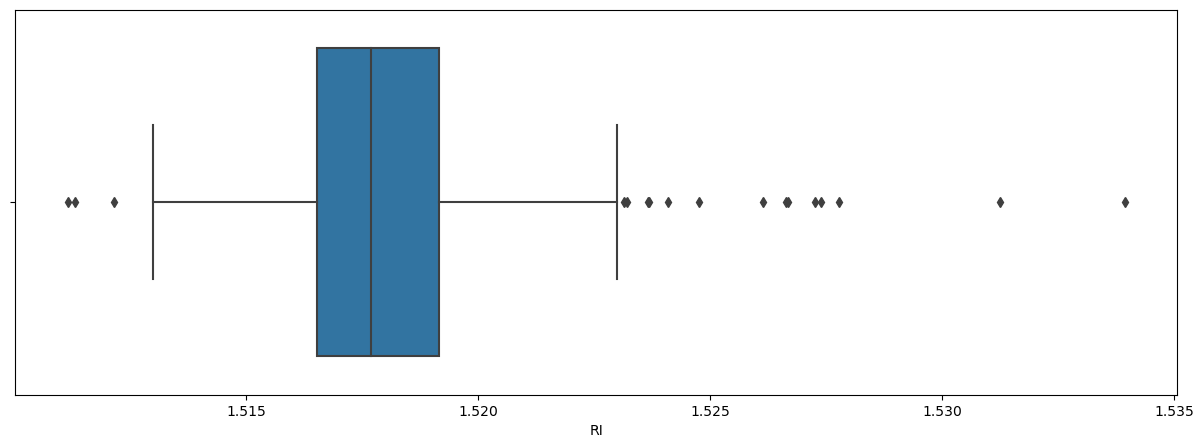

1.6254305060087644


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


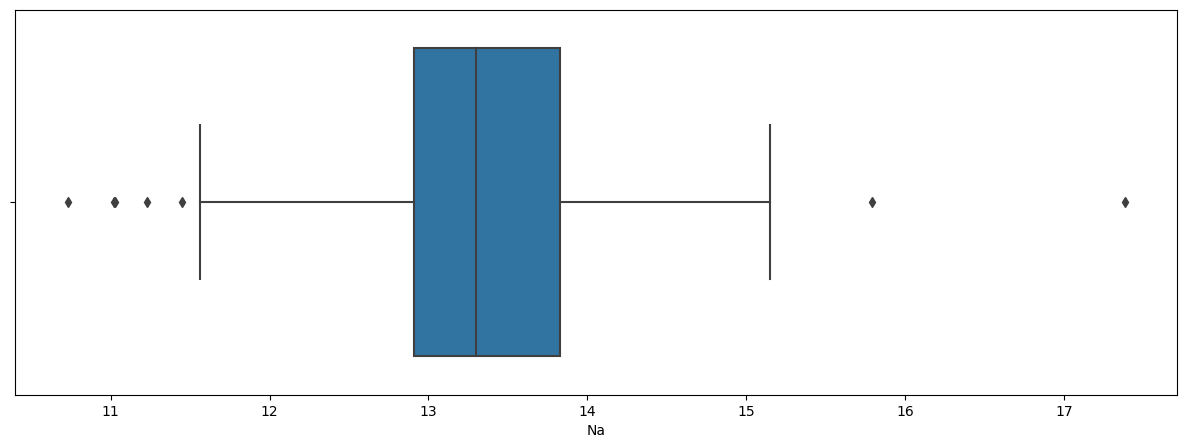

0.4541814536577495


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


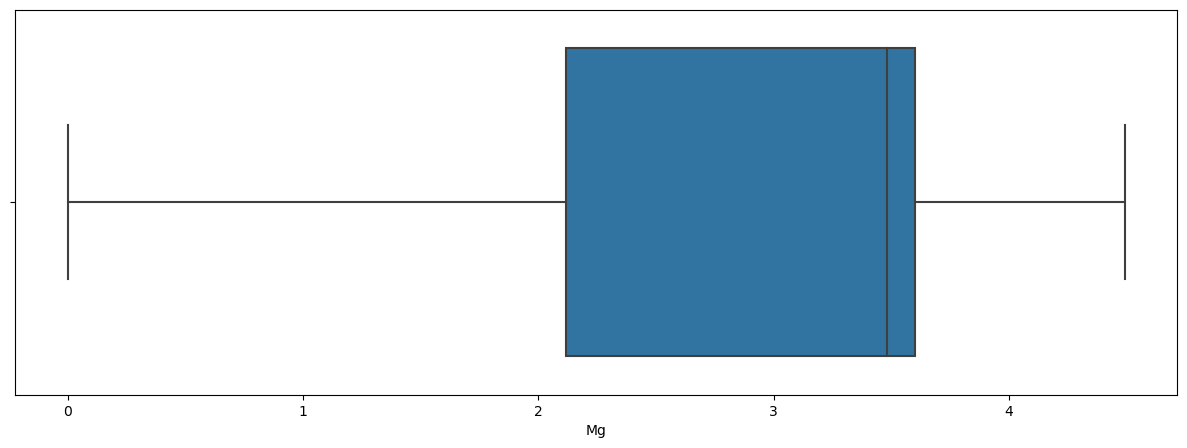

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.1525593175802356


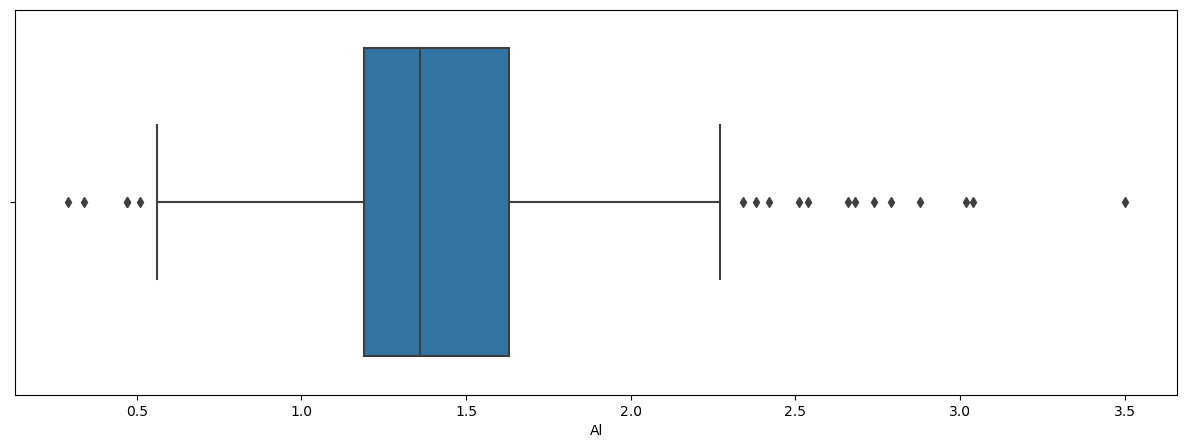

0.9072898090246346


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


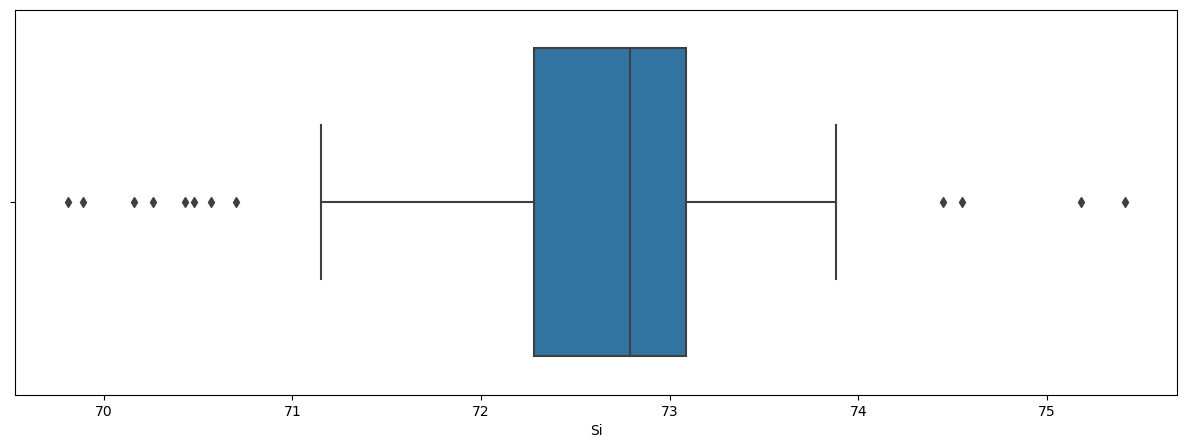

-0.7304472251318588


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


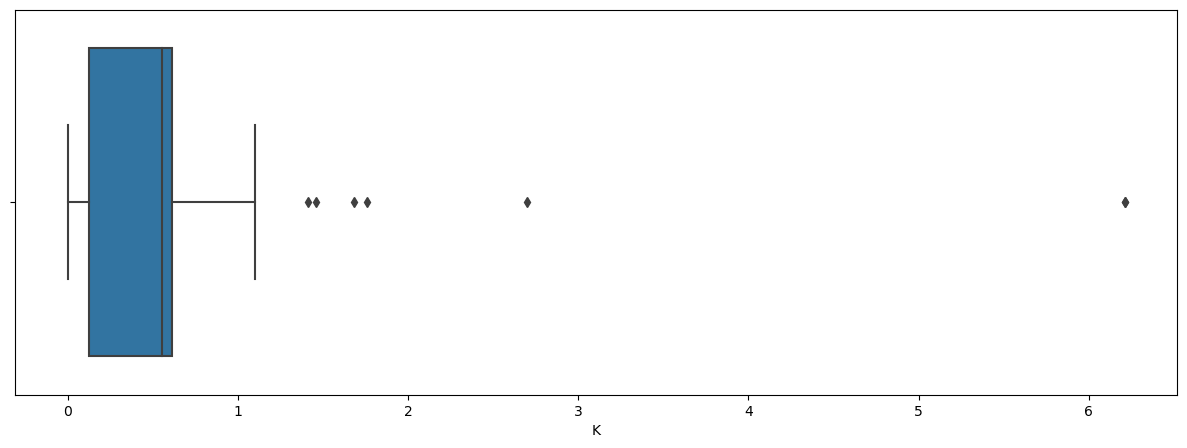

6.55164830960496


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


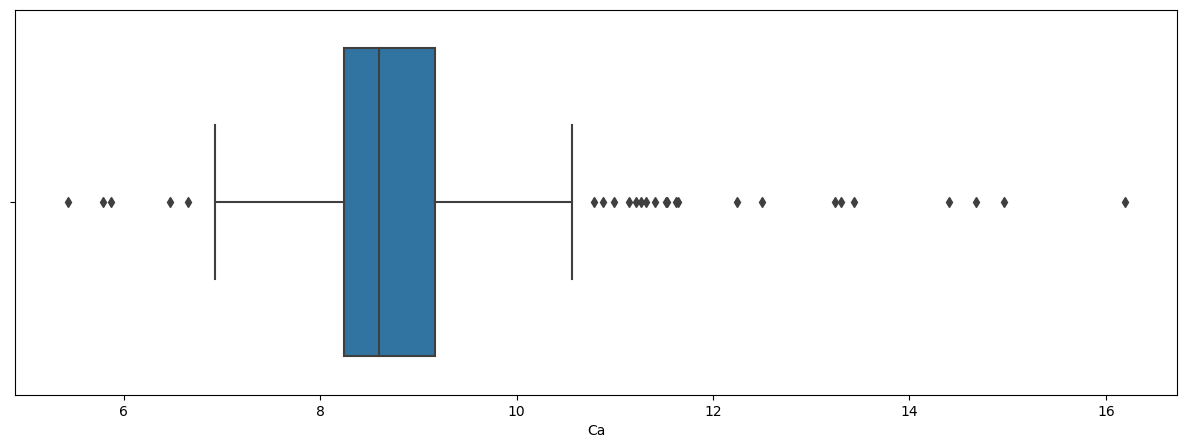

2.0470539131183103


c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


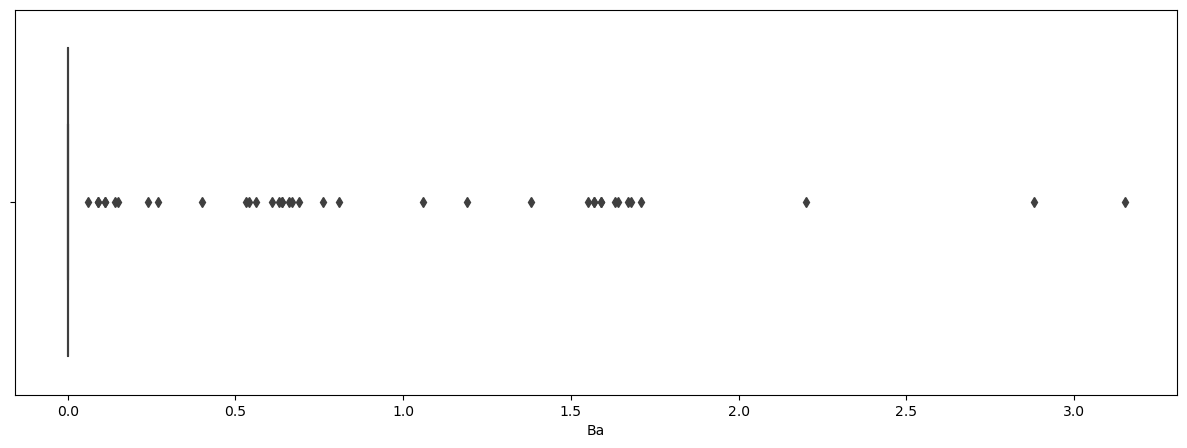

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.4164245693025577


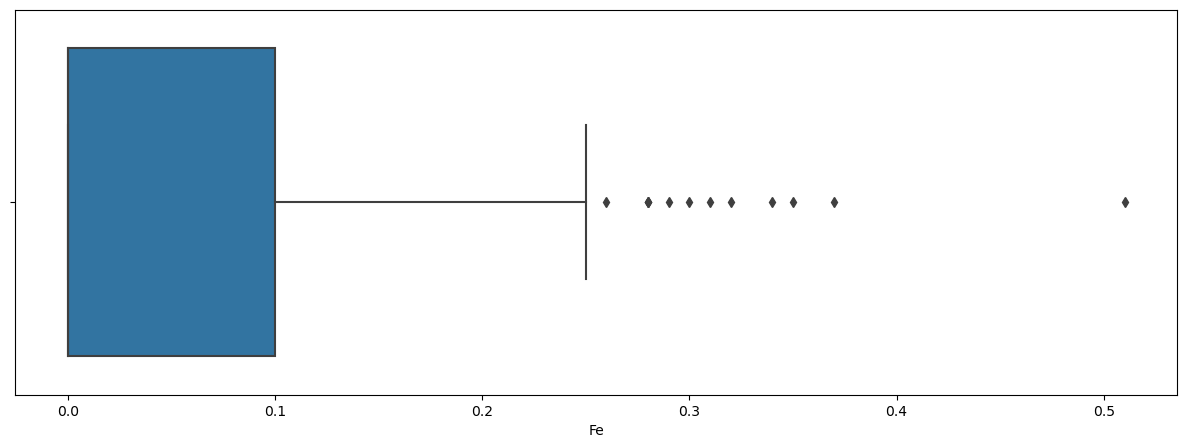

1.754327470435831


In [105]:
plt.figure(figsize=(10,8))
for feat in features:
    skew = data[feat].skew()
    plt.figure(figsize=(15,5))
    sns.boxplot(data[feat])
    plt.show()
    print(skew)

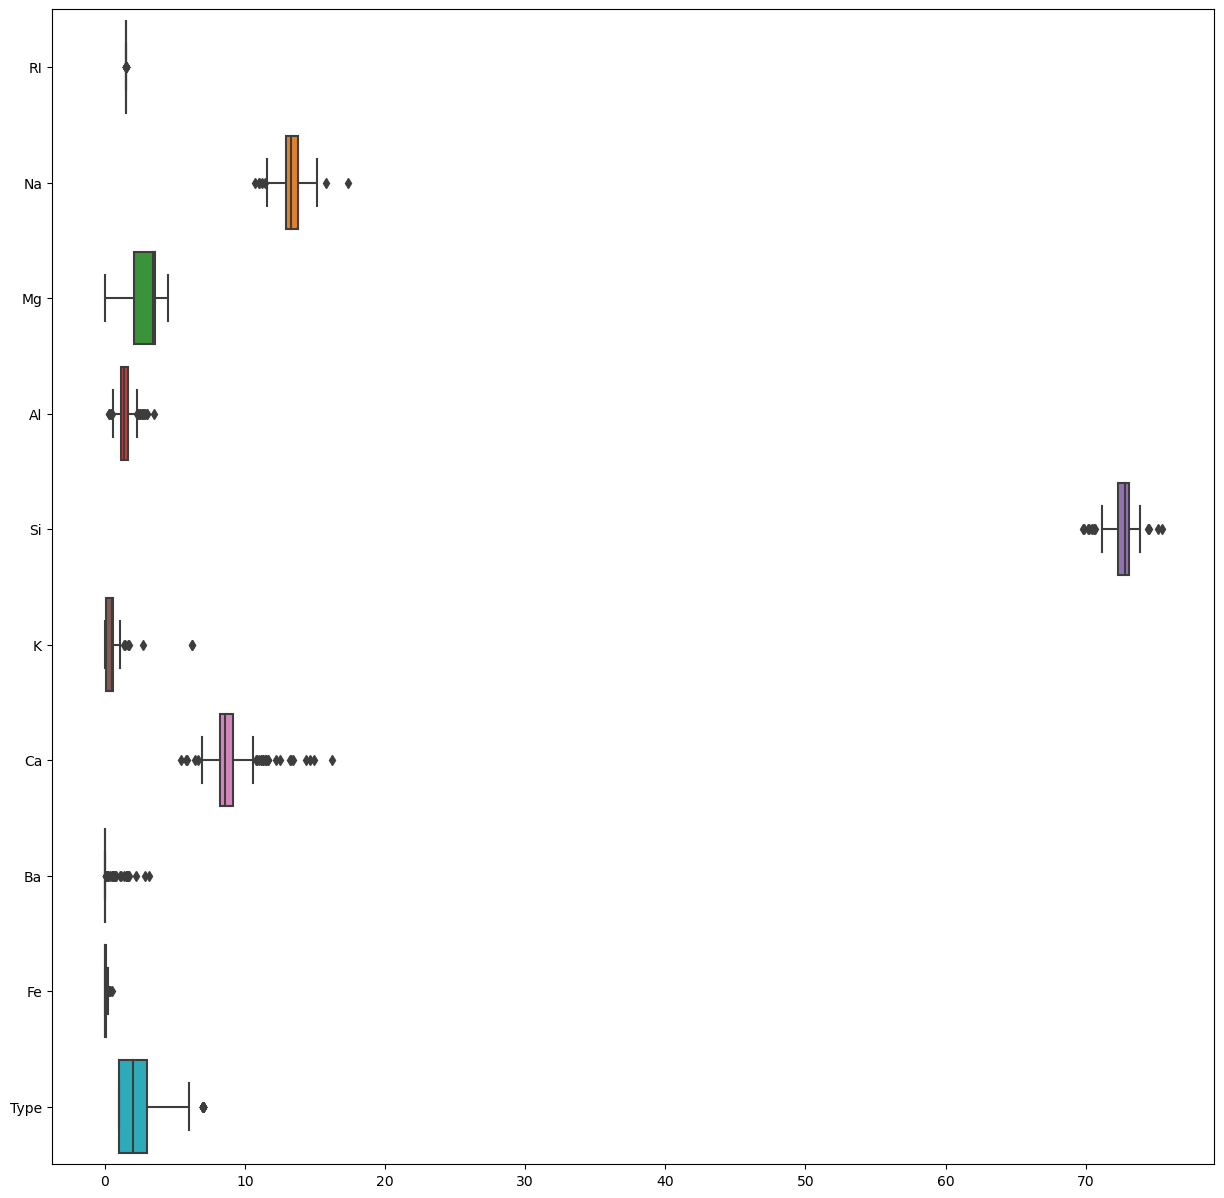

In [106]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data, orient="h");

<Figure size 800x800 with 0 Axes>

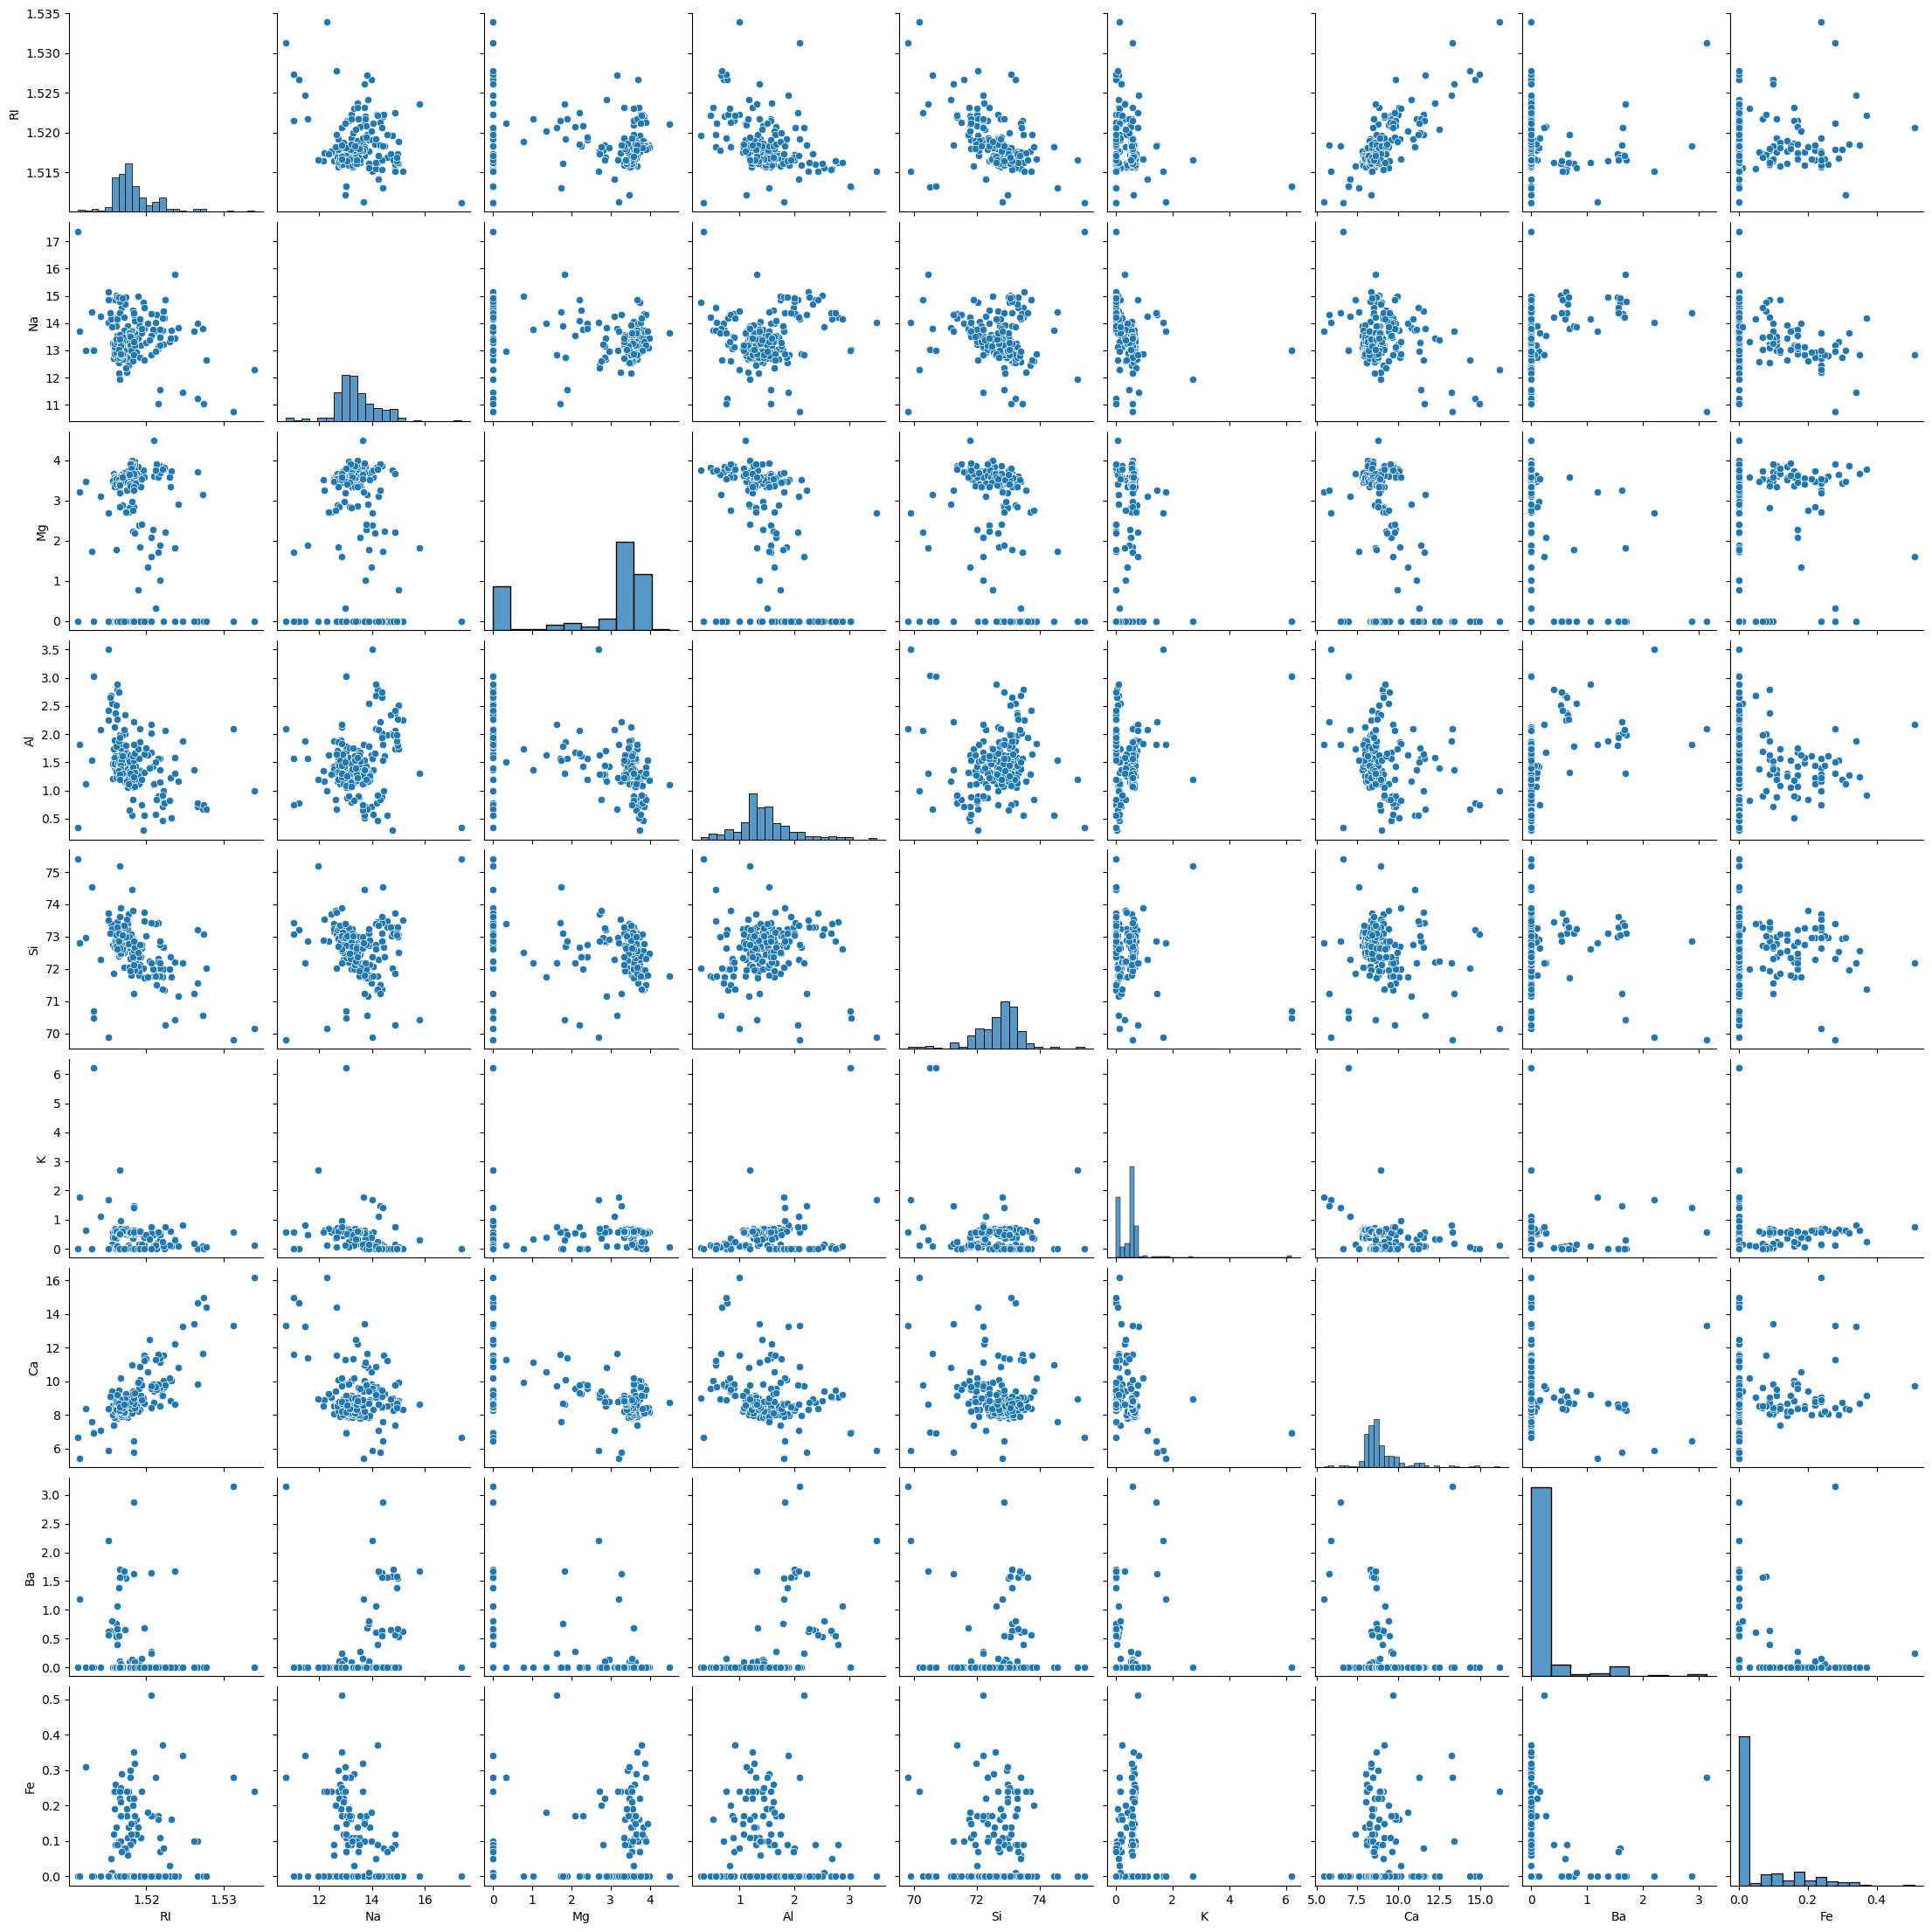

In [107]:
plt.figure(figsize=(8,8))
sns.pairplot(data[features],palette='coolwarm')
plt.show()

Из EDA можно сделать вывод, что признаки Na, Al, Si близки к нормальному распределению  

Исследуем признаки на выбросы несколькими способами с помощью моделей ML

In [108]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [109]:
OCSVM = OneClassSVM(nu=0.1)
OCSVM.fit(data.drop(columns=['Type']))

OneClassSVM(nu=0.1)

In [110]:
y_pred =OCSVM.predict(data.drop(columns=['Type']))
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [111]:
unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))


{-1: 23, 1: 191}

In [112]:
IF = IsolationForest()

In [113]:
IF.fit(data.drop(columns=['Type']))

IsolationForest()

In [114]:
y_pred = IF.predict(data.drop(columns=['Type']))
y_pred


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [115]:
unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))

{-1: 24, 1: 190}

In [116]:
LOF = LocalOutlierFactor(novelty=True)


In [117]:
LOF.fit(data.drop(columns=['Type']))

LocalOutlierFactor(novelty=True)

In [118]:
y_pred = LOF.predict(data.drop(columns=['Type']))
y_pred

c:\Users\lokky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [119]:
unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))

{-1: 30, 1: 184}

Удалим выбросы с помощью булевой маски. Будем использовать алгоритм Isolation Forest

In [120]:
y_pred = IF.predict(data.drop(columns=['Type']))

In [121]:
unique, counts = np.unique(y_pred, return_counts=True)

dict(zip(unique, counts))

{-1: 24, 1: 190}

In [122]:
mask = y_pred == 1
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [123]:
data_clear = data[mask]

In [124]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      190 non-null    float64
 1   Na      190 non-null    float64
 2   Mg      190 non-null    float64
 3   Al      190 non-null    float64
 4   Si      190 non-null    float64
 5   K       190 non-null    float64
 6   Ca      190 non-null    float64
 7   Ba      190 non-null    float64
 8   Fe      190 non-null    float64
 9   Type    190 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.3 KB


In [130]:
data_clear['Type'].value_counts()

1    70
2    68
7    21
3    16
6     8
5     7
Name: Type, dtype: int64

Повторим обучение на очищенных от выбросов данных

In [125]:
X_train, X_test, y_train, y_test = train_test_split(data_clear.drop(columns=['Type']), data_clear['Type'], test_size=0.2, random_state=42)

In [126]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [127]:
clf.score(X_train,y_train)

1.0

In [128]:
y_pred = clf.predict(X_test)

In [129]:
accuracy_score(y_test, y_pred)

0.8157894736842105

### Выводы
В ходе выполнения практики была обучена модель Random Forest Classifier на полных данных и на очищенных от выбросов данных. 
Accuracy для неочищенного датафрейма получилась выше - 0.8837 против 0.8157. Это может быть связано с ктем, что с выбросами нужно работать более скурпелезно и использовать решение основанное на нескольких моделях. Для поиски выбросов использовались три модели: OneClassSVM, IsolationForest, LocalOutlierFactor. Для удаления выбросов использовался результат работы Изолирующего Леса. С выбросами работать надо, чтобы на реальных данных модель работала более стабильно, но необходимо подбирать совокупности алгоритмов, чтобы получить сопоставимые метрики с неочищенными данными. 

### Feature Selection

In [82]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [83]:
x_data_generated

array([[-0.56587362, -1.02701085,  0.04929962, ...,  1.3329183 ,
        -1.20908005,  0.53402402],
       [-0.14681038, -1.10925976,  0.82491677, ..., -0.80356593,
        -0.73292629,  0.06655581],
       [-0.11377309,  0.80392684,  0.0295581 , ..., -0.49728711,
        -0.64825113, -0.04608549],
       ...,
       [ 0.15517791,  1.12531373, -0.72337603, ...,  0.82782916,
         1.11409364, -0.72321263],
       [ 0.59380992,  2.03992171, -1.13888593, ..., -2.17047737,
         0.86234612,  0.26438888],
       [-0.14983558,  0.59858459,  0.95340098, ..., -0.80557638,
        -0.80751458,  1.95703064]])

In [84]:
y_data_generated

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [85]:
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
clf = LogisticRegression()

In [87]:
cross_val_score(clf, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.78

Построим матрицу корреляций, посмотрим какие признаки хорошо коррелируют между собой. 

In [88]:
df = pd.np.column_stack((x_data_generated,y_data_generated))

C:\Users\lokky\AppData\Local\Temp\ipykernel_22280\745887499.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = pd.np.column_stack((x_data_generated,y_data_generated))


In [89]:
df.shape

(100, 21)

In [90]:
df = pd.DataFrame(df)

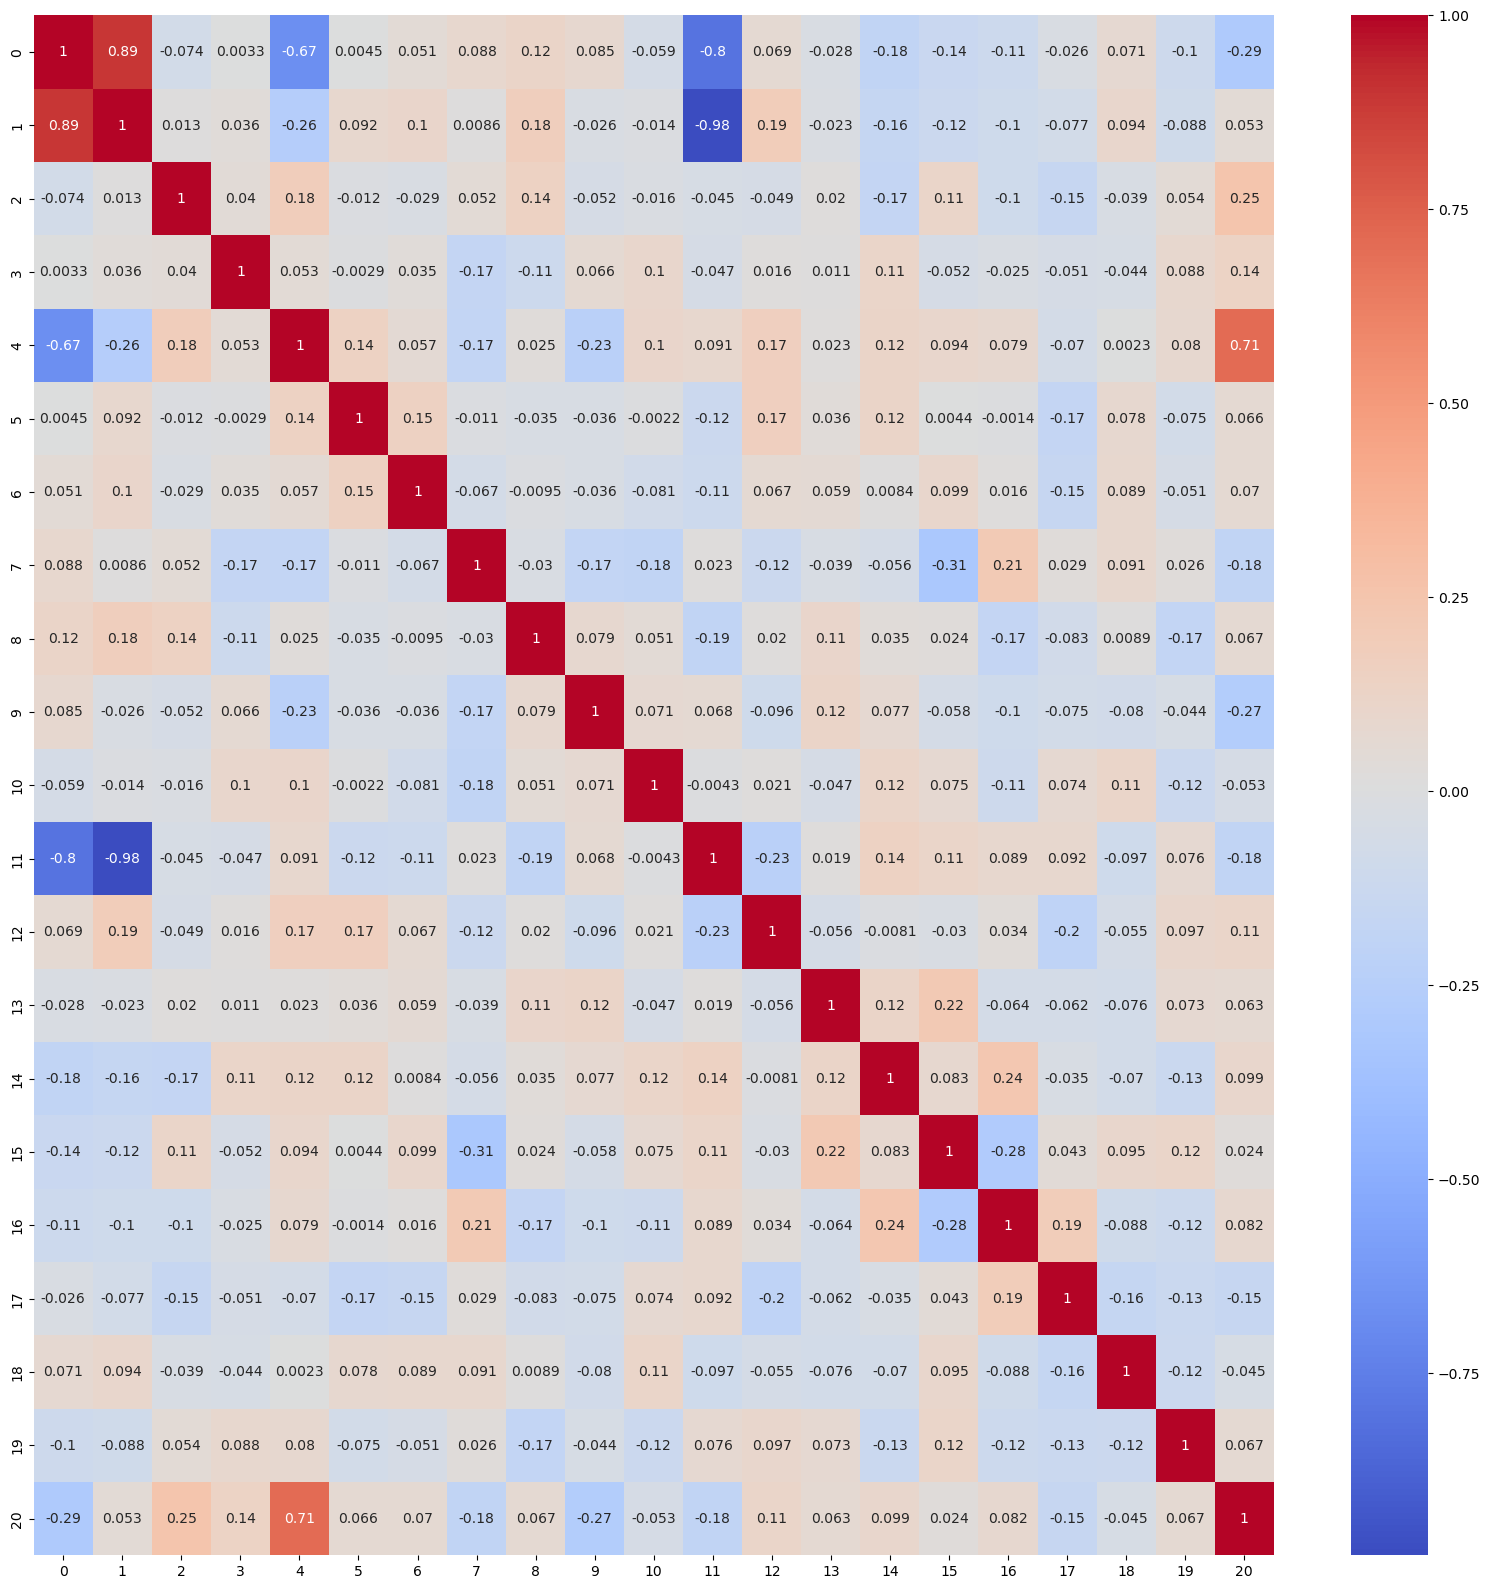

In [91]:
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True, cmap= 'coolwarm');

По диаграмме видно, что высокая корреляцция между признаками 0 и 1, 1 и 11. Удалим их из модели

In [92]:
df = df.loc[:, (df.columns != 0) & (df.columns != 1) & (df.columns != 11)]
df.shape

(100, 18)

In [93]:
df.head(3)

,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20
0,0.049300,1.538119,1.589507,-0.804268,0.367431,-1.098788,-1.768957,-0.486500,1.184209,0.398706,-1.256859,1.315572,1.718943,1.083683,1.332918,-1.209080,0.534024,1.0
1,0.824917,-0.615974,-0.949337,0.612656,-0.108200,2.939717,0.024342,-0.282243,-1.509737,0.127775,-0.532407,-0.391736,-0.932697,1.622921,-0.803566,-0.732926,0.066556,0.0
2,0.029558,1.998532,1.952095,-0.423059,0.370844,0.846019,-0.788769,-1.056615,-0.592833,0.915535,-0.598168,0.426767,-0.645863,1.193946,-0.497287,-0.648251,-0.046085,1.0


In [94]:
df.columns

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')

Отсечем низковариативные признаки с помощью метода (VarianceThreshold)

In [95]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(1))
X = sel.fit_transform(df.drop(columns=[20]))
X.shape

(100, 8)

Осталось 8 признаков. Выведем их 

In [96]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,0.049300,1.538119,1.589507,-1.768957,0.398706,1.315572,1.718943,1.083683
1,0.824917,-0.615974,-0.949337,0.024342,0.127775,-0.391736,-0.932697,1.622921
2,0.029558,1.998532,1.952095,-0.788769,0.915535,0.426767,-0.645863,1.193946
3,-1.021915,0.308567,1.482840,-0.741719,-0.508087,1.158006,-1.021388,1.521086
4,0.110287,-1.490211,-1.082277,2.471131,0.184957,0.551607,-0.004080,0.384291


Повторим обучение на полученных данных

In [97]:
cross_val_score(clf, X, df[20], scoring='accuracy').mean()

0.8800000000000001

Осуществим отбор признаков на основе дисперсионного анализа, с помощью скоринговой функции для классификации f_classif отберем 5 лучших признаков:

In [98]:
from sklearn.feature_selection import SelectKBest, f_classif
y = y_data_generated
X = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y)
print(X.shape)
cross_val_score(clf, X, y, scoring="accuracy").mean()


(100, 5)


0.8799999999999999

Отберем признаки с помощью использования модели Логистической регрессии. Используем L2 регуляризацию

In [124]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

In [179]:
lr = LogisticRegression(penalty="l1", solver='liblinear').fit(x_data_generated, y_data_generated)
model = SelectFromModel(lr, prefit=True)
X = model.transform(x_data_generated)
print(X.shape)
cross_val_score(clf, X, y_data_generated, scoring="accuracy").mean()

(100, 17)


0.8

Используем рекурсивный метод и отберем признаки с помощью модели Random Forest и встроенного атрибута feature_impotance.

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=2,  random_state=1, max_features=5 ).fit(x_data_generated, y_data_generated)
rf.score(x_data_generated, y_data_generated)

0.92

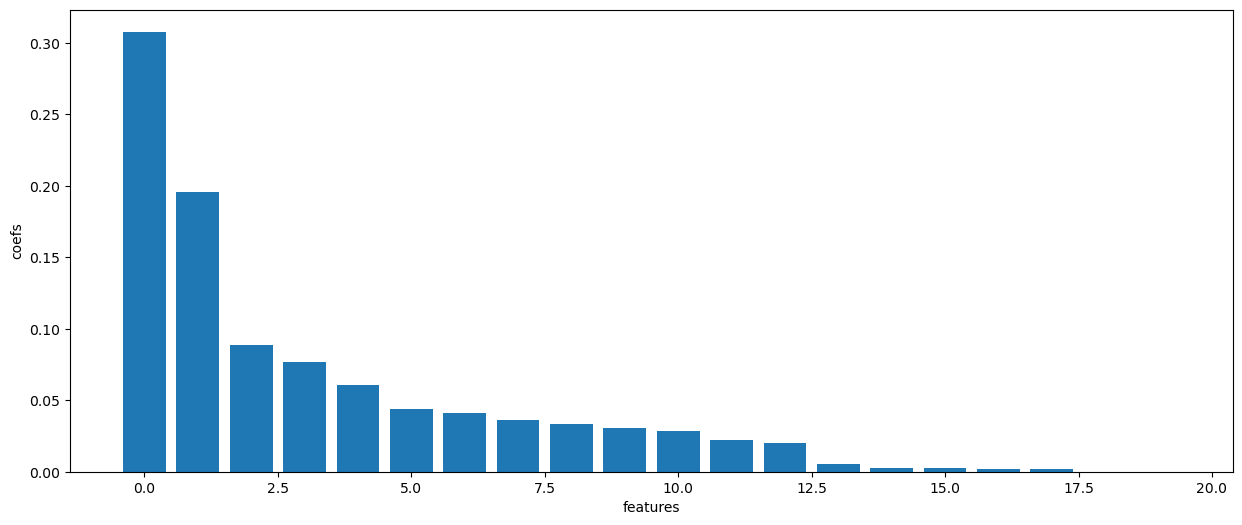

In [156]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.feature_importances_)), sorted(rf.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

In [166]:
X = pd.DataFrame(x_data_generated)[[0, 1, 2, 3, 4]]
cross_val_score(clf, X, y_data_generated, scoring="accuracy").mean()

0.9099999999999999

Лучший результат получается, если оставляем 5 признаков, с 0 по 4

Отберем признаки методом перебора SequentialFeatureSelector.

In [167]:
from sklearn.feature_selection import SequentialFeatureSelector

In [169]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=2, direction="forward"
).fit(x_data_generated, y_data_generated)


In [170]:
X = sfs_forward.transform(x_data_generated)
X.shape

(100, 2)

In [171]:
cross_val_score(clf, X, y_data_generated, scoring="accuracy").mean()

0.89

### Выводы
В ходе работы было протестировано несколько подходов к выбору признаков. Получены следующие результаты:
|Способ отбора| Q-ty features| Score|
|-------------|:------------:|:----:|
|Без отбора| 20|0.78|
|Cтатистические методы|8|0.88|
|SelectKBest|5|0.88|
|SelectFromModel|17|0.8|
|RandomForestClassifier|5|0.9|
|SequentialFeatureSelector|2|0.89|

Как видно из таблицы, все методы показали неплохие результаты и улучшили модель, одновременно с оптимизацией количества признаков. 
Наиболее оптимальный результат показала модель перебора, найдя 2 признака, на которых результат метрики близок к максимальному



### Clastering

In [4]:
import matplotlib.pyplot as plt
import cv2
import skimage


TypeError: 'numpy._DTypeMeta' object is not subscriptable

In [ ]:
def draw_picture(image, title, bgr=False):
b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
new_image = cv2.merge([r, g, b])
plt.figure(figsize=(7, 5))
plt.axis(‘off’)
plt.imshow(new_image)
plt.title(title)
plt.show()